# LGMVIP Data Science

# Task - 1
Iris Flowers Classification ML Project

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
# loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/BhaktiThorve/Iris-flowers-dataset/main/iris.csv')

In [3]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# no. of rows and columns in a given dataset
df.shape

(150, 5)

In [5]:
# First 5 rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# last 5 rows
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# Informtaion of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Statistical tools of dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# datatype of each column
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Class             object
dtype: object

In [10]:
# no of samples in each class
df['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [11]:
df.loc[5]

SepalLengthCm            5.4
SepalWidthCm             3.9
PetalLengthCm            1.7
PetalWidthCm             0.4
Class            Iris-setosa
Name: 5, dtype: object

In [12]:
df.iloc[0:4]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [13]:
# counts the no. of missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Class            0
dtype: int64

In [14]:
# assigning numbers to the each of the class
r = {'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3}
df.Class = [r[i] for i in df.Class]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data Visualization

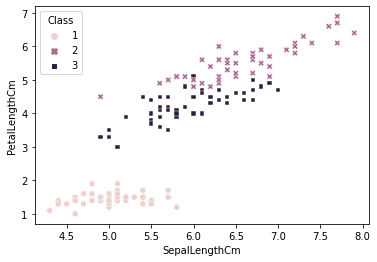

In [15]:
# scatterplot for each attribute
sns.scatterplot(x='SepalLengthCm',y = 'PetalLengthCm',data = df,hue = 'Class',style = 'Class')
plt.show()

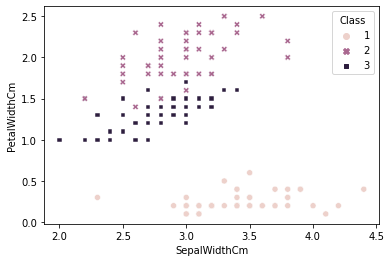

In [16]:
sns.scatterplot(x='SepalWidthCm',y = 'PetalWidthCm',data = df,hue = 'Class',style = 'Class')
plt.show()

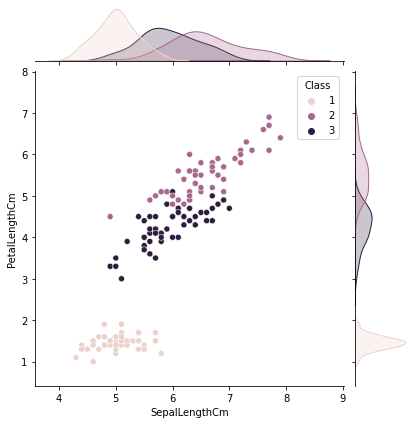

In [17]:
# jointplot for SepalLengthCm and PetalLengthCm wrt class
sns.jointplot(x='SepalLengthCm',y = 'PetalLengthCm',data = df,hue = 'Class')
plt.show()

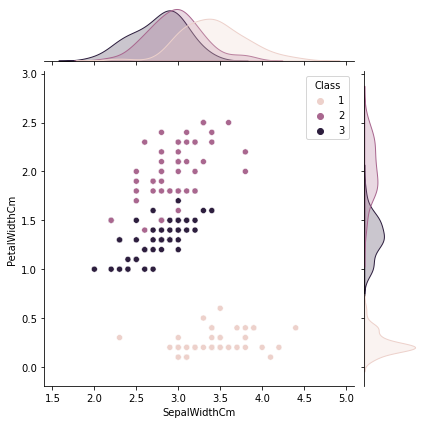

In [18]:
# jointplot for SepalWidthCm and PetalWidthCm wrt class
sns.jointplot(x='SepalWidthCm',y = 'PetalWidthCm',data = df,hue = 'Class')
plt.show()

<AxesSubplot:>

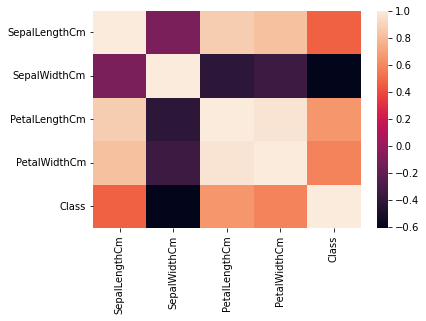

In [19]:
# heatmap for coreelation
sns.heatmap(df.corr())

## Training and Testing the data

In [20]:
#splitting the data in x and y for training and testing
x = df[['SepalLengthCm','SepalWidthCm' ,'PetalLengthCm', 'PetalWidthCm']]
y = df['Class']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =100)

In [22]:
x_train


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
99,5.7,2.8,4.1,1.3
119,6.0,2.2,5.0,1.5
12,4.8,3.0,1.4,0.1
16,5.4,3.9,1.3,0.4
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [23]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,6.4,2.8,5.6,2.1
11,4.8,3.4,1.6,0.2
118,7.7,2.6,6.9,2.3
15,5.7,4.4,1.5,0.4
123,6.3,2.7,4.9,1.8
135,7.7,3.0,6.1,2.3
32,5.2,4.1,1.5,0.1
1,4.9,3.0,1.4,0.2
116,6.5,3.0,5.5,1.8
45,4.8,3.0,1.4,0.3


In [24]:
#scaling
mms = MinMaxScaler()

In [25]:
x_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] = mms.fit_transform(x_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
x_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] = mms.transform(x_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [26]:
x_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,120.000000,120.000000,120.000000,120.000000
mean,0.413657,0.475379,0.478801,0.452778
std,0.223119,0.196760,0.302139,0.311287
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.363636,0.100877,0.083333
50%,0.388889,0.454545,0.570175,0.500000
75%,0.562500,0.590909,0.719298,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [27]:
x_test.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,30.000000,30.000000,30.000000,30.000000
mean,0.488889,0.493939,0.504678,0.477778
std,0.250755,0.201071,0.342293,0.348391
min,0.111111,0.090909,0.052632,0.000000
25%,0.263889,0.375000,0.105263,0.093750
50%,0.513889,0.454545,0.622807,0.520833
75%,0.659722,0.613636,0.780702,0.781250
max,0.944444,1.090909,1.035088,0.916667


In [28]:
#fitting the training data
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
reg.predict(x_test)

array([2.63777981, 1.27940316, 3.24253088, 0.41842303, 2.55490668,
       2.63509969, 0.73845913, 1.52194156, 2.54609043, 1.48618191,
       1.06334918, 2.14821774, 1.2189911 , 1.21697648, 2.27642896,
       2.33979456, 2.87115572, 2.40079208, 3.11129773, 2.45547233,
       2.59271513, 1.19333138, 2.71533856, 1.43327411, 2.55532705,
       2.38236173, 2.27636204, 1.33283098, 2.59539231, 2.30916963])

In [30]:
# actual and predicted data
predicted = pd.DataFrame({'Actual':y_test,'Predicted':reg.predict(x_test)})
predicted

,Actual,Predicted
128,2,2.637780
11,1,1.279403
118,2,3.242531
15,1,0.418423
123,2,2.554907
135,2,2.635100
32,1,0.738459
1,1,1.521942
116,2,2.546090
45,1,1.486182


In [31]:
# accuracy of dataset
reg.score(x_test,y_test)

0.459950409001352

## Conclusion
RSME of model is minimum so our model is good.